In [0]:
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
import numpy as np
import matplotlib.pyplot as plt

In [0]:
mar_budget    = np.array([60, 80,  100  , 30, 50, 20, 90,  10],  dtype=float)
subs_gained = np.array([160, 200, 240, 100, 140, 80, 220, 60],  dtype=float)

for i,c in enumerate(mar_budget):
  print("{} Market budget = {} new subscribers gained".format(c, subs_gained[i]))

60.0 Market budget = 160.0 new subscribers gained
80.0 Market budget = 200.0 new subscribers gained
100.0 Market budget = 240.0 new subscribers gained
30.0 Market budget = 100.0 new subscribers gained
50.0 Market budget = 140.0 new subscribers gained
20.0 Market budget = 80.0 new subscribers gained
90.0 Market budget = 220.0 new subscribers gained
10.0 Market budget = 60.0 new subscribers gained


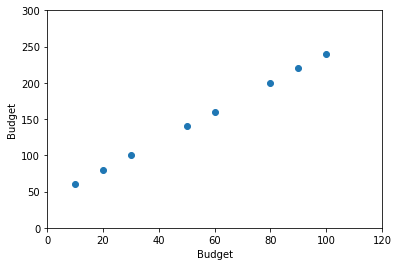

In [0]:
plt.scatter(mar_budget,subs_gained)
plt.xlabel("Budget")
plt.ylabel("Budget")
plt.xlim(0,120)
plt.ylim(0,300)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(mar_budget,subs_gained, train_size=0.8, test_size=0.2)

In [0]:
#random_state = 42
x_train

array([ 20.,  30.,  90.,  50., 100.,  10.])

In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=4, input_shape=[1]),
  tf.keras.layers.Dense(units=5),
  tf.keras.layers.Dense(units=1)
])
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))
trained_model = model.fit(x_train, y_train, epochs=1000, verbose=False)
print("Finished training the model")

Finished training the model


In [0]:
for layer in model.layers: print (layer.get_config(), layer.get_weights())

{'name': 'dense_1', 'trainable': True, 'batch_input_shape': (None, 1), 'dtype': 'float32', 'units': 4, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[ 0.41993746, -0.50145096,  0.31850895,  0.07461722]],
      dtype=float32), array([ 4.7047305, -5.057289 ,  4.970032 , -1.2081007], dtype=float32)]
{'name': 'dense_2', 'trainable': True, 'dtype': 'float32', 'units': 5, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[ 0.3711526 ,  1.1402621 

In [0]:
y_pred = model.predict(x_test)
print('Actual Values\tPredicted Values')
print(y_test,'   ',y_pred.reshape(1,-1))
print()

Actual Values	Predicted Values
[160. 200.]     [[160. 200.]]


In [0]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0